In [218]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [219]:
#allows plots to appear directly in the notebook
%matplotlib inline

In [220]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
#this tutorial illustrates simple and multiple linear regression

In [ ]:
#this tutorial illustrates how important linear relationships are
#between response and predictor variables

In [ ]:
#this tutorial illustrates how to use evaluation metrics
#R-squared statistic
#RMSE or root mean squared error
#significance of predictor variables at p-value > .05
#and how to compute equations of prediction

In [ ]:
#upload data
df = pd.read_csv(r"C:\Users\Sierra\Documents\Preprocessed_LOS_READM.csv")

In [ ]:
#checking assumptions of linear regression
#linear relationships between response and independent variables

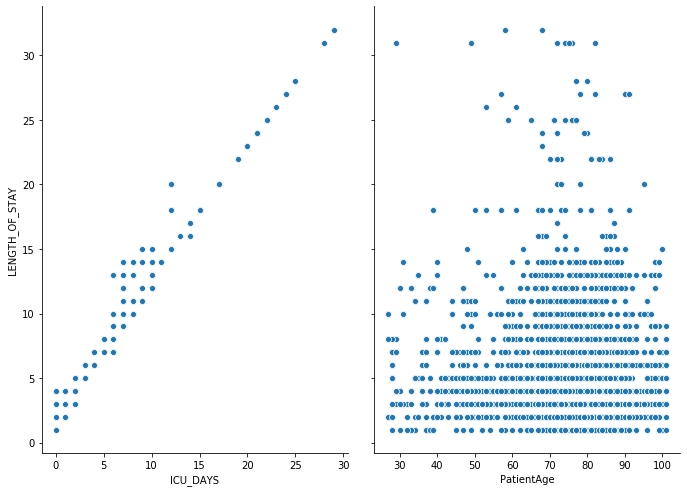

In [265]:
#scatterplots showing linear relationships
sns.pairplot(df, x_vars=['ICU_DAYS','PatientAge',], y_vars='LENGTH_OF_STAY', size=7, aspect=0.7)

In [267]:
#imports
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [375]:
#simple linear regression model using statsmodels
lm1 = smf.ols(formula='LENGTH_OF_STAY ~ ICU_DAYS', data=df).fit()

In [508]:
#print intercept and coefficient
#interpretation : a 1 unit increase in ICU_DAYS yields
#a 1.05 unit increase in LENGTH_OF_STAY
lm1.params

Intercept    2.486108
ICU_DAYS     1.056764
dtype: float64

In [510]:
#examine using the equation of prediction
# LENGTH_OF_STAY = 2.486108 + 1.056764*ICU_DAYS
#pretend a patient spent 3 days in ICU 
#yielding 5.6 days in LENGTH_OF_STAY (at hospital)
2.486108 + 1.056764*3

5.6564

In [377]:
#print p-vale
#interpretation : ICU_DAYS is significant 
#due to p-value < .05
lm1.pvalues

Intercept    0.0
ICU_DAYS     0.0
dtype: float64

In [378]:
#print R-squared statistic
#interpretation : 97.5% of data is explained by model
lm1.rsquared

0.9756795572632404

In [379]:
#print the confidence interval
#interpretation : the range of plausible values is
#between 1.055909 and 1.057619
lm1.conf_int()

,0,1
Intercept,2.482054,2.490161
ICU_DAYS,1.055909,1.057619


In [380]:
#observe the same values in the summary below
#observe p-values, confidence intervals, intercept, and coefficients
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         LENGTH_OF_STAY   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 5.866e+06
Date:                Tue, 31 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:30:40   Log-Likelihood:            -1.4219e+05
No. Observations:              146220   AIC:                         2.844e+05
Df Residuals:                  146218   BIC:                         2.844e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4861      0.002   1202.036      0.000       2.482       2.490
ICU_DAYS       1.0568      0.000   2421.967      0.000       1.056       1.058
==============================================================================
Omnibus:                    19132.683   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           191146.984
Skew:                           0.273   Prob(JB):                         0.00
Kurtosis:                       8.575   Cond. No.                         5.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [381]:
#the same simple linear regression model using scikit-learn
#continuous response variable
y2 = df['LENGTH_OF_STAY']

In [382]:
#independent variable
feature_col = ['ICU_DAYS']
X2 = df[feature_col]

In [383]:
#model
lm2 = LinearRegression()
lm2.fit(X2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [384]:
#print coefficients
#notice this doesn't show the names
print(lm2.intercept_)
print(lm2.coef_)

2.4861076577704315
[1.0567638]


In [385]:
#pair feature name with its coefficient
#interpretation : 1 day in ICU yields 1.05 days in hospital 
list(zip(feature_col, lm2.coef_))

[('ICU_DAYS', 1.0567638041670226)]

In [ ]:
#equation of prediction
LENGTH_OF_STAY = 2.48610 + 1.05676*ICU_DAYS

In [386]:
#print R-squared for the model
#interpretation : 97.5% of data is explained by model
lm2.score(X2, y2)

0.9756795572632404

In [448]:
#create a multiple regression model with statsmodels
#continuous response variable
y3 = df['LENGTH_OF_STAY']

In [449]:
#all columns except response
X31 = df.drop('LENGTH_OF_STAY', axis=1)

In [450]:
#prep independent variables for model
X32 = sm.add_constant(X31)

C:\Users\Sierra\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [451]:
#model
lm3 = sm.OLS(y3, X32).fit()

In [452]:
#print R-squared statistic
#interpretation : 97.79% of data explained by model
lm3.rsquared

0.9778614856897111

In [453]:
#print summary results
#observe p-values, confidence intervals, intercept, and coefficients
print (lm3.summary())

                            OLS Regression Results                            
Dep. Variable:         LENGTH_OF_STAY   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 1.196e+05
Date:                Tue, 31 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:55:57   Log-Likelihood:            -1.3532e+05
No. Observations:              146220   AIC:                         2.707e+05
Df Residuals:                  146165   BIC:                         2.713e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
#equation of prediction
#I will put ... for all other variables
#interpretation : 1 yr of PatientAge yields .0011 days in hospital 
#being a patient at Valley City Reg Hosp yileds .0266 days in hospital
LENGTH_OF_STAY = 1.6616 + 0.0011*PatientAge ...
...+ 0.0266*Valley City Regional Hospital

In [454]:
#create a multiple regression model with scikit-learn
#continuous response variable
y4 = df['LENGTH_OF_STAY']

In [455]:
#all columns except response
X4 = df.drop('LENGTH_OF_STAY', axis=1)

In [456]:
# call columns to copy and paste below
X4.columns

Index([                    'PatientAge',               'DRG_APR_SEVERITY',                       'ICU_DAYS',                     'op_visits6',               'Num_Chronic_Cond',                 'order_set_used',                 'operationcount',                              'M',                         'Others',                          'White',        'INCISION, EXCISION, AND',       'INTERVIEW, EVALUATION, C',        'NONOPERATIVE INTUBATION',               'NUCLEAR MEDICINE',                   'No Procedure',             'OPERATIONS ON ANUS',       'OPERATIONS ON BONE MARRO',       'OPERATIONS ON CHEST WALL',            'OPERATIONS ON LIVER',        'OPERATIONS ON LYMPHATIC',             'OPERATIONS ON NOSE',       'OPERATIONS ON RECTUM REC',       'OPERATIONS ON SKIN AND S',       'OPERATIONS ON SPINAL COR',       'OTHER DIAGNOSTIC RADIOLO',       'OTHER NONOPERATIVE PROCE',       'OTHER OPERATIONS ON ABDO',       'OTHER OPERATIONS ON HEAR',       'OTHER OPERATIONS ON LARY',
       

In [511]:
#create feature_cols
feature_cols = ['PatientAge','DRG_APR_SEVERITY','ICU_DAYS','op_visits6','Num_Chronic_Cond','order_set_used','operationcount','M','Others','White','INCISION, EXCISION, AND','INTERVIEW, EVALUATION, C','NONOPERATIVE INTUBATION','NUCLEAR MEDICINE','No Procedure','OPERATIONS ON ANUS','OPERATIONS ON BONE MARRO','OPERATIONS ON CHEST WALL','OPERATIONS ON LIVER','OPERATIONS ON LYMPHATIC','OPERATIONS ON NOSE','OPERATIONS ON RECTUM REC','OPERATIONS ON SKIN AND S','OPERATIONS ON SPINAL COR','OTHER DIAGNOSTIC RADIOLO','OTHER NONOPERATIVE PROCE','OTHER OPERATIONS ON ABDO','OTHER OPERATIONS ON HEAR','OTHER OPERATIONS ON LARY','OTHER OPERATIONS ON LUNG','OTHER OPERATIONS ON TEET','OTHER OPERATIONS ON VESS','PROCEDURES AND INTERVENT','PROCEDURES RELATED TO TH','REPAIR AND PLASTIC OPERA','REPLACEMENT AND REMOVAL','Y',2,3,4,5,6,7,8,9,10,11,12,'Hilding-Long Memorial Hospital','Independence Medical Center','Mercy Hospital','Oxbow Regional Hospital','St. Anthony Medical Center','Superior-Parkland Hospital','Valley City Regional Hospital']

In [458]:
#model
lm4 = LinearRegression()
lm4.fit(X4, y4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [459]:
#print coefficients paired with feature names
list(zip(feature_cols, lm4.coef_))

[('PatientAge', 0.0011202790175937683),
 ('DRG_APR_SEVERITY', 0.06530496535264713),
 ('ICU_DAYS', 1.0509663330226804),
 ('op_visits6', -0.0065531516747128205),
 ('Num_Chronic_Cond', -0.002829087488255647),
 ('order_set_used', -0.05596281354744988),
 ('operationcount', 0.02177929025593297),
 ('M', 0.002644775060758664),
 ('Others', 0.02966495622679015),
 ('White', -0.039399459232297845),
 ('INCISION, EXCISION, AND', 0.4581684216678441),
 ('INTERVIEW, EVALUATION, C', 0.4845342607083353),
 ('NONOPERATIVE INTUBATION', 0.34948081053485086),
 ('NUCLEAR MEDICINE', 0.3090403029411619),
 ('No Procedure', 0.3968251669194792),
 ('OPERATIONS ON ANUS', 2.7403741981257657),
 ('OPERATIONS ON BONE MARRO', 0.07737580780533401),
 ('OPERATIONS ON CHEST WALL', 0.340379052141479),
 ('OPERATIONS ON LIVER', 0.8940846925303507),
 ('OPERATIONS ON LYMPHATIC', -0.1771032398072039),
 ('OPERATIONS ON NOSE', 0.3869023742382279),
 ('OPERATIONS ON RECTUM REC', 0.7620231731280757),
 ('OPERATIONS ON SKIN AND S', 0.6829

In [512]:
#print intercept
print(lm4.intercept_)

1.6615719530437971


In [ ]:
#equation of prediction
#I will put ... for all other variables
#interpretation : 1 yr of PatientAge yields .00112 days in hospital 
#being a patient at Valley City Reg Hosp yileds .02658 days in hospital
LENGTH_OF_STAY = 1.66157 + 0.00112*PatientAge ...
...+ 0.02658*Valley City Regional Hospital

In [460]:
#print R-squared for the model
lm4.score(X4, y4)

0.9778614856897111

In [461]:
#fine tuning the multiple regression model with feature selection
#eliminate insignificant variables with p-value > .05
#using statsmodels

In [462]:
#response variable
y5 = df['LENGTH_OF_STAY']

In [463]:
#all columns except response and insignificant predictors
X51 = df.drop(['LENGTH_OF_STAY','Num_Chronic_Cond','M','OPERATIONS ON BONE MARRO',3,'Superior-Parkland Hospital','Valley City Regional Hospital'], axis=1)

In [464]:
#prep independent variables for model
X52 = sm.add_constant(X51)

C:\Users\Sierra\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [465]:
#model
lm5 = sm.OLS(y5, X52).fit()

In [517]:
#print R-squared statistic
#notice the R-suared statistic by even 1/100th of 1%
lm5.rsquared

0.9778603641970607

In [467]:
#print summary
print (lm5.summary())

                            OLS Regression Results                            
Dep. Variable:         LENGTH_OF_STAY   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 1.345e+05
Date:                Tue, 31 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:56:06   Log-Likelihood:            -1.3532e+05
No. Observations:              146220   AIC:                         2.707e+05
Df Residuals:                  146171   BIC:                         2.712e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
#equation of prediction
#I will put ... for all other variables
#interpretation : 1 yr of PatientAge yields .0011 days in hospital 
#being a patient at Oxbow Reg Hosp yileds .4310 days in hospital
LENGTH_OF_STAY = 1.7227 + 0.0011*PatientAge ...
...+ 0.4310*Oxbow Regional Hospital

In [468]:
#fine tuning the multiple regression model using scikit learn
#using train/test split to see if predictors with p-value > .05 are useful
#model 6 with all predictors
#model 7 without insignificant predictors
#using the root mean squared error as a model evaluation metric

In [469]:
#comparative multiple regression model in scikit-learn
#using train/test split
#including all predictor variables

In [470]:
#response variable
y6 = df['LENGTH_OF_STAY']

In [471]:
#all columns except response 
X6 = df.drop('LENGTH_OF_STAY', axis=1)

In [472]:
#split data
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, random_state=1)

In [473]:
#model
lm6 = LinearRegression()

In [474]:
#fit model
lm6.fit(X6_train, y6_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [475]:
#predict
y6_pred = lm6.predict(X6_test)

Text(0, 0.5, 'Predicted Values')

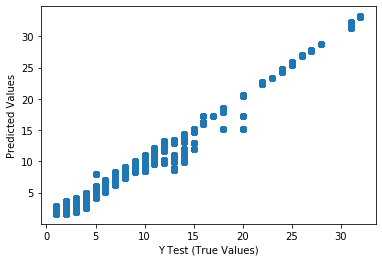

In [476]:
#scatterplot of actual vs predicted values
#linear relationship looks good
plt.scatter(y6_test,y6_pred)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

In [477]:
#print root mean squared error
#interpretation : a range of +-0.60701 calculates model error
#actual LENGTH_OF_STAY will be less than or greater than 0.60701 of predicted value
#for example if length of stay is predicted to be 5
#then actual length of stay could be between 4.39299 and 5.60701
print(np.sqrt(metrics.mean_squared_error(y6_test, y6_pred)))

0.6070117537255889


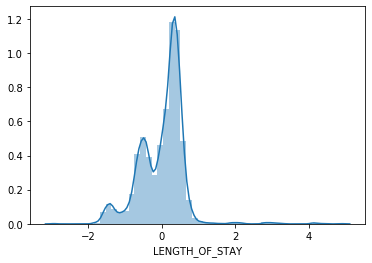

In [478]:
#residual plot
#somewhat normally distributed
sns.distplot((y6_test-y6_pred),bins=50)

In [479]:
#R-squared statistic
metrics.explained_variance_score(y6_test,y6_pred)

0.9783488374233068

In [480]:
#intercept
print(lm6.intercept_)

1.6615976815682076


In [481]:
#coefficients
lm6.coef_

array([ 1.11276057e-03,  6.73868969e-02,  1.05108567e+00, -5.98806776e-03,
       -2.63328888e-03, -5.83788270e-02,  2.01186400e-02, -1.84456866e-03,
        2.27949893e-02, -4.20648518e-02,  4.52728743e-01,  4.62429008e-01,
        3.38934216e-01,  2.96490025e-01,  3.88661567e-01,  2.80996803e+00,
        5.61778316e-02,  3.27396955e-01,  8.93981705e-01, -1.83352304e-01,
        3.84604203e-01,  7.70632929e-01,  6.78833608e-01,  3.38494974e-01,
        5.30651322e-01,  4.44463499e-01,  8.34577916e-01,  1.60160099e-01,
        2.10871155e-01,  3.34199590e-01,  3.85561555e-01,  2.60917825e-01,
        1.82410657e-01,  1.05645556e+00,  7.34200755e-01,  7.19988369e-01,
       -5.83788270e-02, -1.37031256e-01,  1.91185595e-03, -1.84557945e-01,
       -3.89688365e-02, -2.45771972e-01, -4.45286498e-01, -1.89656378e-01,
       -1.02854063e-01, -1.10393161e-01, -1.42579594e-01, -8.56183330e-02,
        4.47804106e-01,  3.04234255e-01,  4.16829097e-01,  4.49521773e-01,
        4.10525491e-01,  

In [482]:
#columns
X6_train.columns

Index([                    'PatientAge',               'DRG_APR_SEVERITY',                       'ICU_DAYS',                     'op_visits6',               'Num_Chronic_Cond',                 'order_set_used',                 'operationcount',                              'M',                         'Others',                          'White',        'INCISION, EXCISION, AND',       'INTERVIEW, EVALUATION, C',        'NONOPERATIVE INTUBATION',               'NUCLEAR MEDICINE',                   'No Procedure',             'OPERATIONS ON ANUS',       'OPERATIONS ON BONE MARRO',       'OPERATIONS ON CHEST WALL',            'OPERATIONS ON LIVER',        'OPERATIONS ON LYMPHATIC',             'OPERATIONS ON NOSE',       'OPERATIONS ON RECTUM REC',       'OPERATIONS ON SKIN AND S',       'OPERATIONS ON SPINAL COR',       'OTHER DIAGNOSTIC RADIOLO',       'OTHER NONOPERATIVE PROCE',       'OTHER OPERATIONS ON ABDO',       'OTHER OPERATIONS ON HEAR',       'OTHER OPERATIONS ON LARY',
       

In [483]:
#data frame to print column names with coefficients
cdf6 = pd.DataFrame(lm6.coef_,X6.columns,columns=['Coeff'])

In [484]:
#print columns with coefficients
cdf6

,Coeff
PatientAge,0.001113
DRG_APR_SEVERITY,0.067387
ICU_DAYS,1.051086
op_visits6,-0.005988
Num_Chronic_Cond,-0.002633
order_set_used,-0.058379
operationcount,0.020119
M,-0.001845
Others,0.022795
White,-0.042065


In [ ]:
#equation of prediction
#I will put ... for all other variables
#interpretation : 1 yr of PatientAge yields .00111 days in hospital 
#being a patient at Valley City Reg Hosp yileds .03969 days in hospital
LENGTH_OF_STAY = 1.66159 + 0.00111*PatientAge ...
...+ 0.03969*Oxbow Regional Hospital

In [485]:
#comparative multiple regression model in scikit learn
#excluding predictor columns with p-values > .05

In [486]:
#response variable
y7 = df['LENGTH_OF_STAY']

In [487]:
#all columns except response and insignificant predictors
X7 = df.drop(['LENGTH_OF_STAY','Num_Chronic_Cond','M','OPERATIONS ON BONE MARRO',3,'Superior-Parkland Hospital','Valley City Regional Hospital'], axis=1)

In [488]:
#split data
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, random_state=1)

In [489]:
#model
lm7 = LinearRegression()

In [490]:
#fit model
lm7.fit(X7_train, y7_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [491]:
#predict
y7_pred = lm7.predict(X7_test)

Text(0, 0.5, 'Predicted Values')

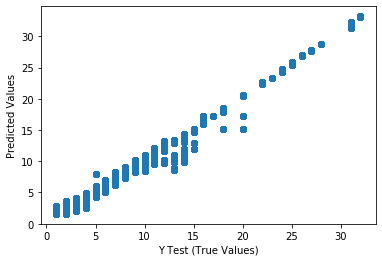

In [492]:
#scatterplot of actual vs predicted values
#linear relationship looks good
plt.scatter(y7_test,y7_pred)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

In [493]:
#print root mean squared error
#interpretation : a range of +-0.60699 calculates model error
#actual LENGTH_OF_STAY will be less than or greater than 0.60701 of predicted value
#if length of stay is predicted to be 5
#then actual length of stay could be between 4.39301 and 5.60699
print(np.sqrt(metrics.mean_squared_error(y7_test, y7_pred)))

0.6069997425911373


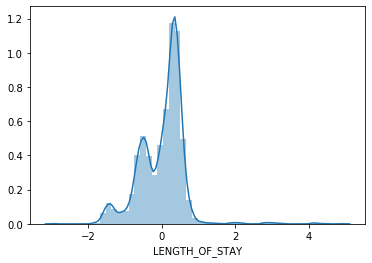

In [494]:
#residual plot is somewhat normally distributed
sns.distplot((y7_test-y7_pred),bins=50)

In [495]:
#R-squared statistic
metrics.explained_variance_score(y7_test,y7_pred)

0.9783496829290176

In [496]:
#equation intercept
print(lm7.intercept_)

1.711114508809394


In [497]:
#coefficients for predictor variables
#notice they are not attatched to their names
lm7.coef_

array([ 1.12450361e-03,  6.75760126e-02,  1.05115710e+00, -6.01543587e-03,
       -5.85366869e-02,  2.01772753e-02,  2.34795521e-02, -4.20967926e-02,
        4.15931059e-01,  4.24358154e-01,  3.01449795e-01,  2.59117447e-01,
        3.51125870e-01,  2.77213388e+00,  2.90932452e-01,  8.54797721e-01,
       -2.18387176e-01,  3.47279186e-01,  7.31467204e-01,  6.41533994e-01,
        2.99961874e-01,  4.93362242e-01,  4.06979086e-01,  7.95771999e-01,
        1.23476533e-01,  1.73794158e-01,  2.97790044e-01,  3.49582926e-01,
        2.23744869e-01,  1.35526471e-01,  1.01757745e+00,  6.96662316e-01,
        6.83519616e-01, -5.85366869e-02, -1.38157744e-01, -1.83883887e-01,
       -3.93854662e-02, -2.45961789e-01, -4.46333344e-01, -1.89976373e-01,
       -1.03219042e-01, -1.10713640e-01, -1.43922023e-01, -8.65535737e-02,
        4.31522025e-01,  2.88465980e-01,  4.00001144e-01,  4.33273259e-01,
        3.94352616e-01])

In [498]:
#call column names
X7_train.columns

Index(['PatientAge', 'DRG_APR_SEVERITY', 'ICU_DAYS', 'op_visits6', 'order_set_used', 'operationcount', 'Others', 'White', 'INCISION, EXCISION, AND', 'INTERVIEW, EVALUATION, C', 'NONOPERATIVE INTUBATION', 'NUCLEAR MEDICINE', 'No Procedure', 'OPERATIONS ON ANUS', 'OPERATIONS ON CHEST WALL', 'OPERATIONS ON LIVER', 'OPERATIONS ON LYMPHATIC', 'OPERATIONS ON NOSE', 'OPERATIONS ON RECTUM REC', 'OPERATIONS ON SKIN AND S', 'OPERATIONS ON SPINAL COR', 'OTHER DIAGNOSTIC RADIOLO', 'OTHER NONOPERATIVE PROCE', 'OTHER OPERATIONS ON ABDO', 'OTHER OPERATIONS ON HEAR', 'OTHER OPERATIONS ON LARY', 'OTHER OPERATIONS ON LUNG', 'OTHER OPERATIONS ON TEET', 'OTHER OPERATIONS ON VESS', 'PROCEDURES AND INTERVENT', 'PROCEDURES RELATED TO TH', 'REPAIR AND PLASTIC OPERA', 'REPLACEMENT AND REMOVAL', 'Y', 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'Hilding-Long Memorial Hospital', 'Independence Medical Center', 'Mercy Hospital', 'Oxbow Regional Hospital', 'St. Anthony Medical Center'], dtype='object')

In [499]:
#create data frame of columns with their coefficients
cdf7 = pd.DataFrame(lm7.coef_,X7.columns,columns=['Coeff'])

In [500]:
#print data frame of columns with their coefficients
cdf7

,Coeff
PatientAge,0.001125
DRG_APR_SEVERITY,0.067576
ICU_DAYS,1.051157
op_visits6,-0.006015
order_set_used,-0.058537
operationcount,0.020177
Others,0.023480
White,-0.042097
"INCISION, EXCISION, AND",0.415931
"INTERVIEW, EVALUATION, C",0.424358


In [ ]:
#equation of prediction
#I will put ... for all other variables
#interpretation : 1 yr of PatientAge yields .00112 days in hospital 
#being a patient at St Anthony Med Cntr yileds .39435 days in hospital
LENGTH_OF_STAY = 1.71111 + 0.00112*PatientAge ...
...+ 0.39435*St Anthony Medical Center

In [ ]:
#DISCUSSION   DISCUSSION   DISCUSSION   DISCUSSION  DISCUSSION

In [ ]:
#comparative models explained
#we see the R-squared statistic increase as more data is added
#we use RMSE as model evaluation metric

In [513]:
#both lm1 and lm2 use only ICU_DAYS to predict
#97.57% of data explained by the lm1 model
lm1.rsquared

0.9756795572632404

In [514]:
#both lm1 and lm2 use only ICU_DAYS to predict
#97.57% of data explained by the lm2 model
lm2.score(X2, y2)

0.9756795572632404

In [515]:
#both lm3 and lm4 use all predictors in model
#note R-squared statistic increases to 97.79%
#as more data is added the R-square goes up
lm3.rsquared

0.9778614856897111

In [516]:
#both lm3 and lm4 use all predictors in model
#note R-squared statistic increases to 97.79%
#as more data is added the R-square goes up
lm4.score(X4, y4)

0.9778614856897111

In [518]:
#notice eliminating insignificant predictors from lm5
#insignificance is p-value > .05
#doesn't improve R-square statistic 97.79%
#it goes down a tiny bit as less data is in the model
lm5.rsquared

0.9778603641970607

In [519]:
#let's look at RMSE in scikit-learn for model evaluation
#RMSE with all predictors
#interpretation : a range of +-0.60701 calculates model6 error
#actual LENGTH_OF_STAY will be less than or greater than 0.60701 of predicted value
#for example, if length of stay is predicted to be 5
#then actual length of stay could be between 4.39299 and 5.60701
print(np.sqrt(metrics.mean_squared_error(y6_test, y6_pred)))

0.6070117537255889


In [520]:
#let's look at RMSE in scikit-learn for model evaluation
#RMSE without insignificant predictors
#insignificance is p-value > .05
#interpretation : a range of +-0.60699 calculates model error
#actual LENGTH_OF_STAY will be less than or greater than 0.60699 of predicted value
#for example, if length of stay is predicted to be 5
#then actual length of stay could be between 4.39301 and 5.60699
print(np.sqrt(metrics.mean_squared_error(y7_test, y7_pred)))

0.6069997425911373


In [ ]:
#interpretation : .60701 is not very different from .60699
#results don't necessarily improve much
#when eliminating insignificant variables from the model 

In [ ]:
#let's do one last train/test split model with scikit-learn
#use RMSE to compare simple and multiple regression models

In [501]:
#split data from 2nd linear model 
#using ICU_DAYS only to predict LENGTH_OF_STAY
X8_train, X8_test, y8_train, y8_test = train_test_split(X2, y2, random_state=1)

In [502]:
#model
lm8 = LinearRegression()

In [503]:
#fit model
lm8.fit(X8_train, y8_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [504]:
#predict
y8_pred = lm8.predict(X8_test)

In [505]:
#print RMSE
print(np.sqrt(metrics.mean_squared_error(y8_test, y8_pred)))

0.6348641153796373


Text(0, 0.5, 'Predicted Values')

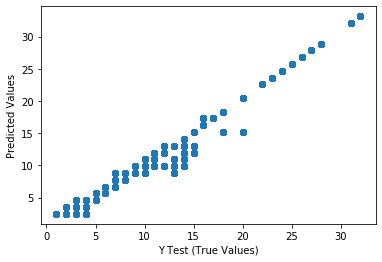

In [506]:
#scatterplot of residuals
#linear relationship of actual vs. predicted looks good
plt.scatter(y8_test,y8_pred)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

In [507]:
#R-squared statistic
metrics.explained_variance_score(y8_test,y8_pred)

0.9763155724773738

In [ ]:
#interpretation
#while adding in more predictor variables does improve R-square
#the model doesn't improve much in terms of RMSE

In [521]:
#smallest RMSE form lm7 eliminating insignificant predictors
#insignificance is p-value > .05
#interpretation : a range of +-0.60699 calculates model error
#actual LENGTH_OF_STAY will be less than or greater than 0.60699 of predicted value
#for example, if length of stay is predicted to be 5
#then actual length of stay could be between 4.39301 and 5.60699 days
#this translates to between 4days 9hrs 26min and 5days 14hrs 34 min
#this model has an error with a range of about 17hrs 8min
print(np.sqrt(metrics.mean_squared_error(y7_test, y7_pred)))

0.6069997425911373


In [522]:
#RMSE from simple linear regression using only ICU_DAYS to predict
#interpretation : a range of +-0.63486 calculates model error
#actual LENGTH_OF_STAY will be less than or greater than 0.63486 of predicted value
#for example, if length of stay is predicted to be 5
#then actual length of stay could be between 4.36514 and 5.63486 days
#this translates to between 4days 8hrs 45min and 5days 15hrs 20min
#this model has an error with a range of about 18hrs 35min
print(np.sqrt(metrics.mean_squared_error(y8_test, y8_pred)))

0.6348641153796373


In [ ]:
#conclusion
#including more predictive variables beyond ICU_DAYS will yield 
#an improvement in predicted values of hospital LENGTH_OF_STAY 
#the model only improves prediction by less than 1.5 hrs sooner
#18hrs 35min - 17 hrs 8min = 1hr 27min

In [ ]:
#how to deal with multicollinearity will be illustrated in another project